In [1]:
!pip install rasterio earthpy geopandas 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 62.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 35.2 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 30.2 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.9/97.9 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 68.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 64.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 33.6 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.7/14.7 MB 74.5 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.5/313.5 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 225.7/225.7 kB 8.8 MB/s eta 0:00:00


In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep
import rasterio as rio

In [3]:
data = et.data.get_data("vignette-elevation")

Extracted output to /home/codespace/earth-analytics/data/vignette-elevation/.


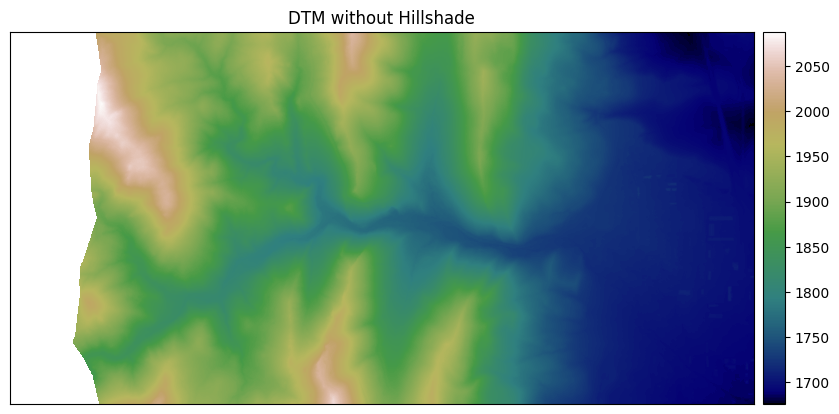

In [4]:
os.chdir(os.path.join(et.io.HOME, "earth-analytics"))
dtm = "data/vignette-elevation/pre_DTM.tif"

with rio.open(dtm) as src:
    elevation = src.read(1)
    # Set masked values to np.nan
    elevation[elevation < 0] = np.nan

ep.plot_bands(
    elevation,
    cmap="gist_earth",
    title="DTM without Hillshade",
    figsize=(10, 6),
)
plt.show()

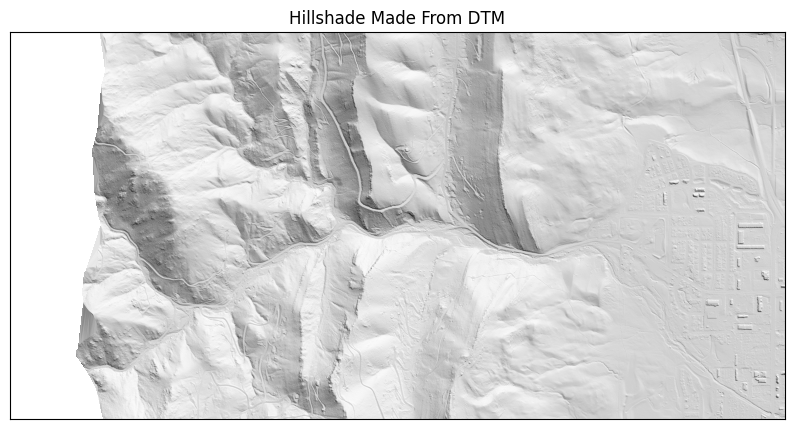

In [5]:
hillshade = es.hillshade(elevation)

ep.plot_bands(
    hillshade,
    cbar=False,
    title="Hillshade Made From DTM",
    figsize=(10, 6),
)
plt.show()

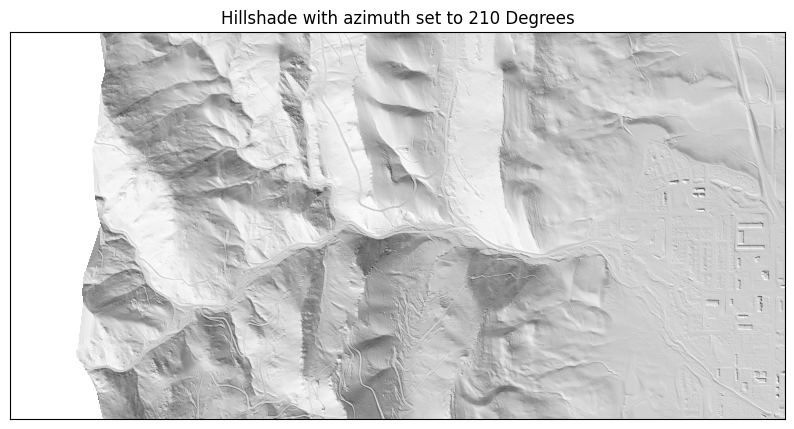

In [6]:
hillshade_azimuth_210 = es.hillshade(elevation, azimuth=210)

ep.plot_bands(
    hillshade_azimuth_210,
    cbar=False,
    title="Hillshade with azimuth set to 210 Degrees",
    figsize=(10, 6),
)
plt.show()

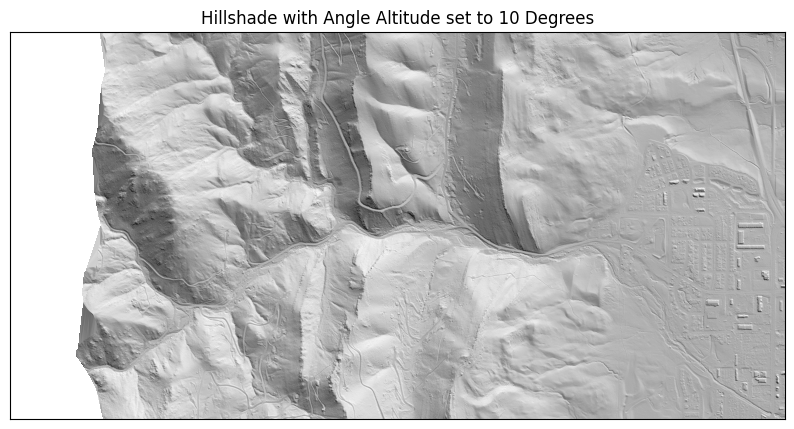

In [7]:
hillshade_angle_10 = es.hillshade(elevation, altitude=10)

ep.plot_bands(
    hillshade_angle_10,
    cbar=False,
    title="Hillshade with Angle Altitude set to 10 Degrees",
    figsize=(10, 6),
)
plt.show()

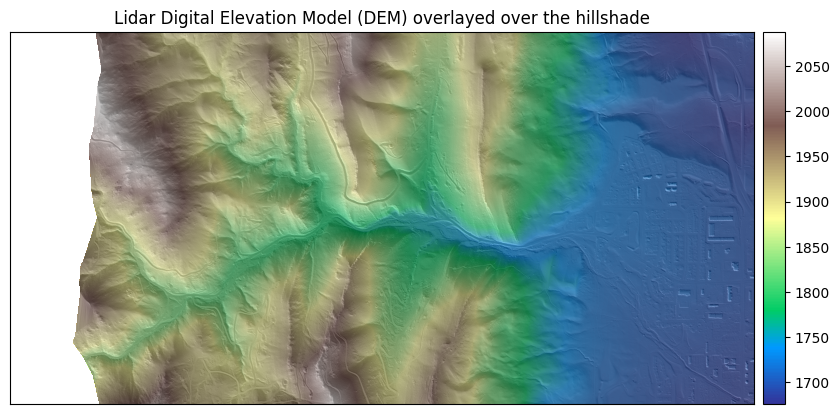

In [10]:
ig, ax = plt.subplots(figsize=(10, 6))
ep.plot_bands(
    elevation,
    ax=ax,
    cmap="terrain",
    title="Lidar Digital Elevation Model (DEM) overlayed over the hillshade",
)
ax.imshow(hillshade, cmap="Greys", alpha=0.5)
plt.show()